## Adding the necessary libraries

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import plotly.graph_objects as go


[nltk_data] Downloading package vader_lexicon to C:\Users\Tee Chang
[nltk_data]     Zen\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Loading cleaned_news_data csv

In [7]:
# Load the cleaned dataset
data = pd.read_csv('cleaned_news_data.csv')

## Exploring the dataset

In [25]:
# Check the balance between real and fake news articles
balance = data['label'].value_counts()
print("Number of fake news articles:", balance[0])
print("Number of real news articles:", balance[1])

Number of fake news articles: 22850
Number of real news articles: 21416


## We can see that the dataset is balanced (Interactive)

In [9]:
# Count the number of fake and real news articles
fake_count = (data['label'] == 0).sum()
real_count = (data['label'] == 1).sum()

# Create the bar plot
fig = go.Figure()
fig.add_trace(go.Bar(x=['Fake', 'Real'], y=[fake_count, real_count], marker_color='rgb(102, 153, 255)'))

# Update the layout
fig.update_layout(
    title='Distribution of Fake and Real News Articles',
    xaxis=dict(title='News Type'),
    yaxis=dict(title='Count'),
    bargap=0.15,
)

# Show the figure
fig.show()

## Checking for nan Values

In [5]:
data.isna().sum()

title           0
text            0
subject         0
date           10
label           0
title_clean     0
text_clean      0
year           10
month          10
dtype: int64

### no nan Values present in relavant columns

## Number of data points 

In [28]:
data.title.count()

44266

In [29]:
data.subject.value_counts()

politicsNews       11271
worldnews          10145
News                9050
politics            6432
left-news           4309
Government News     1498
US_News              783
Middle-east          778
Name: subject, dtype: int64

## Distribution of subjects(Interactive)

In [10]:
# Count the number of subjects by label
subject_label_count = data.groupby(['subject', 'label']).size().reset_index(name='count')

# Create the grouped bar plot
fig = go.Figure()
fig.add_trace(go.Bar(x=subject_label_count[subject_label_count['label'] == 0]['subject'], y=subject_label_count[subject_label_count['label'] == 0]['count'], name='Fake', marker_color='rgb(255, 102, 102)'))
fig.add_trace(go.Bar(x=subject_label_count[subject_label_count['label'] == 1]['subject'], y=subject_label_count[subject_label_count['label'] == 1]['count'], name='Real', marker_color='rgb(102, 153, 255)'))

# Update the layout
fig.update_layout(
    title='Distribution of Subjects by Label',
    xaxis=dict(title='Subject'),
    yaxis=dict(title='Count'),
    barmode='group',
    bargap=0.15,
)

# Show the figure
fig.show()


### Since the topics in subject column are different for both categories, 'subject' will not be included in the input for our models in the Machine Learning and Alogorithm Opitmisation Stage

## Generate word cloud for 'title_clean'

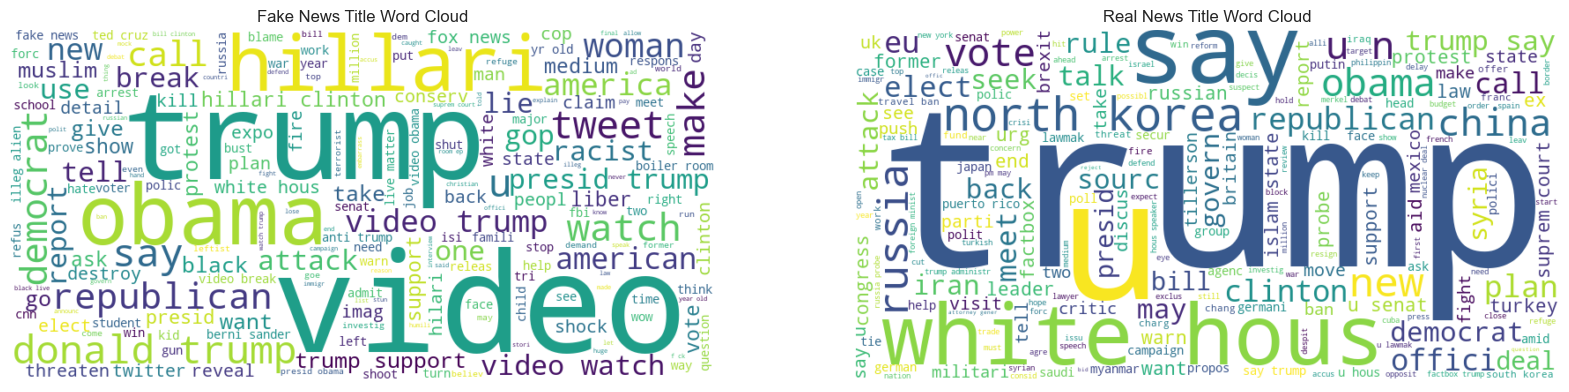

In [31]:
from wordcloud import WordCloud,STOPWORDS
# Create word clouds for fake and real news articles
fake_news = ' '.join(data[data['label'] == 0]['title_clean'])
real_news = ' '.join(data[data['label'] == 1]['title_clean'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)

# Visualize word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.imshow(wordcloud_fake, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Fake News Title Word Cloud')
ax2.imshow(wordcloud_real, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Real News Title Word Cloud')
plt.show()


### The word cloud for fake news titles and real new titles both tend to use sensational or attention-grabbing words such as "trump," "obama," and "hillari(y).". Presumably, the aim is to capture readers attention... 

## Most common words for title_clean(Interactive)

In [12]:
from collections import Counter

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

# Get the corpus and count the most common words
corpus_title = get_corpus(data.title_clean)
counter = Counter(corpus_title)
most_common = counter.most_common(10)
most_common = dict(most_common)

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
            x=list(most_common.values()),
            y=list(most_common.keys()),
            orientation='h'))

# Update the layout
fig.update_layout(
    title='Top 10 Most Common Words in Title Column',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Word'),
    height=500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the figure
fig.show()


### The top 10 most common words in titles include words like "trump" "video" and "u" for both fake and real news. This highlights the importance of politics and current events in news headlines.

## Generate word cloud for 'text_clean'(Interactive)

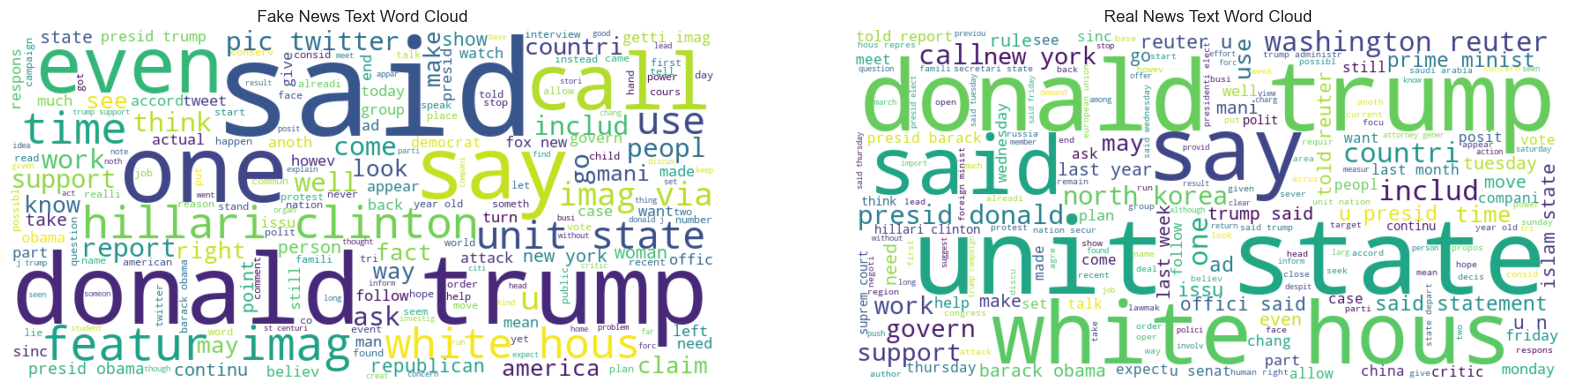

In [32]:
# Create word clouds for fake and real news articles
fake_news = ' '.join(str(text) for text in data[data['label'] == 0]['text_clean'])
real_news = ' '.join(str(text) for text in data[data['label'] == 1]['text_clean'])

wordcloud_fake = WordCloud(width=800, height=400, background_color='white').generate(fake_news)
wordcloud_real = WordCloud(width=800, height=400, background_color='white').generate(real_news)

# Visualize word clouds
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
ax1.imshow(wordcloud_fake, interpolation='bilinear')
ax1.axis('off')
ax1.set_title('Fake News Text Word Cloud')
ax2.imshow(wordcloud_real, interpolation='bilinear')
ax2.axis('off')
ax2.set_title('Real News Text Word Cloud')
plt.show()


### The word cloud for fake news article texts shows that they contain a mix of sensational words and politically charged terms. Real news texts have a more diverse vocabulary and seem to cover a wider range of topics.

## Most common word for text_clean(Interactive)

In [13]:
import plotly.graph_objects as go
from collections import Counter

def get_corpus(text):
    words = []
    for i in text:
        for j in i.split():
            words.append(j.strip())
    return words

# Get the corpus and count the most common words
corpus_text = get_corpus(data.text_clean)
counter = Counter(corpus_text)
most_common = counter.most_common(10)
most_common = dict(most_common)

# Create the horizontal bar chart
fig = go.Figure(go.Bar(
            x=list(most_common.values()),
            y=list(most_common.keys()),
            orientation='h'))

# Update the layout
fig.update_layout(
    title='Top 10 Most Common Words in Text Column',
    xaxis=dict(title='Frequency'),
    yaxis=dict(title='Word'),
    height=500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Show the figure
fig.show()


### The top 10 most common words in texts show a similar pattern to the titles, with words like "trump" and "u" being prominent in both fake and real news articles.

## Number of characters in 'title_clean'(Interactive)

In [14]:
# Get the text lengths for real and fake news articles
real_text_len = data[data['label'] == 1]['title_clean'].str.len()
fake_text_len = data[data['label'] == 0]['title_clean'].str.len()

# Create the histograms
fig = go.Figure()
fig.add_trace(go.Histogram(x=real_text_len, name='Real', marker_color='rgb(102, 153, 255)'))
fig.add_trace(go.Histogram(x=fake_text_len, name='Fake', marker_color='rgb(255, 102, 102)'))

# Update the layout
fig.update_layout(
    title='Distribution of Title Lengths by Label',
    xaxis=dict(title='Title Length'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    bargap=0.1,
    height=500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Add the legend
fig.update_traces(opacity=0.75)
fig.update_layout(showlegend=True)

# Show the figure
fig.show()

### Titles: Fake news titles tend to have a longer character count, highest frequency is 60, compared to real news titles, highest frequency is 50. This could be due to the use of sensational language or clickbait-style headlines in fake news articles.

## Number of characters in 'text_clean'(Interactive)

In [17]:
# Get the text lengths for real and fake news articles
real_text_len = data[data['label'] == 1]['text_clean'].str.len()
fake_text_len = data[data['label'] == 0]['text_clean'].str.len()

# Create the histograms
fig = go.Figure()
fig.add_trace(go.Histogram(x=real_text_len, name='Real', marker_color='rgb(102, 153, 255)'))
fig.add_trace(go.Histogram(x=fake_text_len, name='Fake', marker_color='rgb(255, 102, 102)'))

# Update the layout
fig.update_layout(
    title='Distribution of Text Lengths by Label',
    xaxis=dict(title='Text Length'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    bargap=0.1,
    height=500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Add the legend
fig.update_traces(opacity=0.75)
fig.update_layout(showlegend=True)

# Show the figure
fig.show()


### The distribution of both seems to be a bit different. 350 characters in text is the most common in real text category while around 1300 characters in text are most common in fake text category.

## Number of words in 'title_clean'(Interactive)

In [18]:
# Get the word counts for real and fake news article titles
real_title_word_count = data[data['label'] == 1]['title_clean'].str.split().map(lambda x: len(x))
fake_title_word_count = data[data['label'] == 0]['title_clean'].str.split().map(lambda x: len(x))

# Create the histograms
fig = go.Figure()
fig.add_trace(go.Histogram(x=real_title_word_count, name='Real', marker_color='rgb(102, 153, 255)'))
fig.add_trace(go.Histogram(x=fake_title_word_count, name='Fake', marker_color='rgb(255, 102, 102)'))

# Update the layout
fig.update_layout(
    title='Distribution of Word Counts in Article Titles by Label',
    xaxis=dict(title='Word Count'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    bargap=0.1,
    height=500,
    margin=dict(l=50, r=50, t=50, b=50)
)

# Add the legend
fig.update_traces(opacity=0.75)
fig.update_layout(showlegend=True)

# Show the figure
fig.show()


### Titles: Fake news titles tend to have a longer word count, highest frequency is 10, compared to Real news titles, highest frequency is 8. This could be due to the use of sensational language or clickbait-style headlines in fake news articles.

## Number of words in 'text_clean'(Interactive)

In [37]:
float_rows = data[data['text_clean'].apply(lambda x: isinstance(x, float))]
print(float_rows)

Empty DataFrame
Columns: [title, text, subject, date, label, title_clean, text_clean, year, month, word_count]
Index: []


In [29]:
# Get word count data for real and fake news articles
real_word_counts = data[data['label'] == 1]['text_clean'].str.split().map(lambda x: len(x))
fake_word_counts = data[data['label'] == 0]['text_clean'].str.split().map(lambda x: len(x))

# Create histogram traces
trace_real = go.Histogram(x=real_word_counts, name='Real', marker_color='red', opacity=0.75)
trace_fake = go.Histogram(x=fake_word_counts, name='Fake', marker_color='green', opacity=0.75)

# Create the figure and add the histogram traces
fig = go.Figure(data=[trace_real, trace_fake])

# Update the layout
fig.update_layout(
    title='Distribution of Word Counts in Text by Label',
    xaxis=dict(title='Number of Words'),
    yaxis=dict(title='Count'),
    barmode='overlay',
    bargap=0.1,
    bargroupgap=0.1,
)

# Show the figure
fig.show()


### There is a noticeable difference in the word count of fake and real news texts, with fake news articles tending to have a higher word count at max frequency 190 compared to real news at max frequency 40

## Average word length in 'title_clean'(Interactive)

Text(0.5, 0.98, 'Average word length in each title_clean')

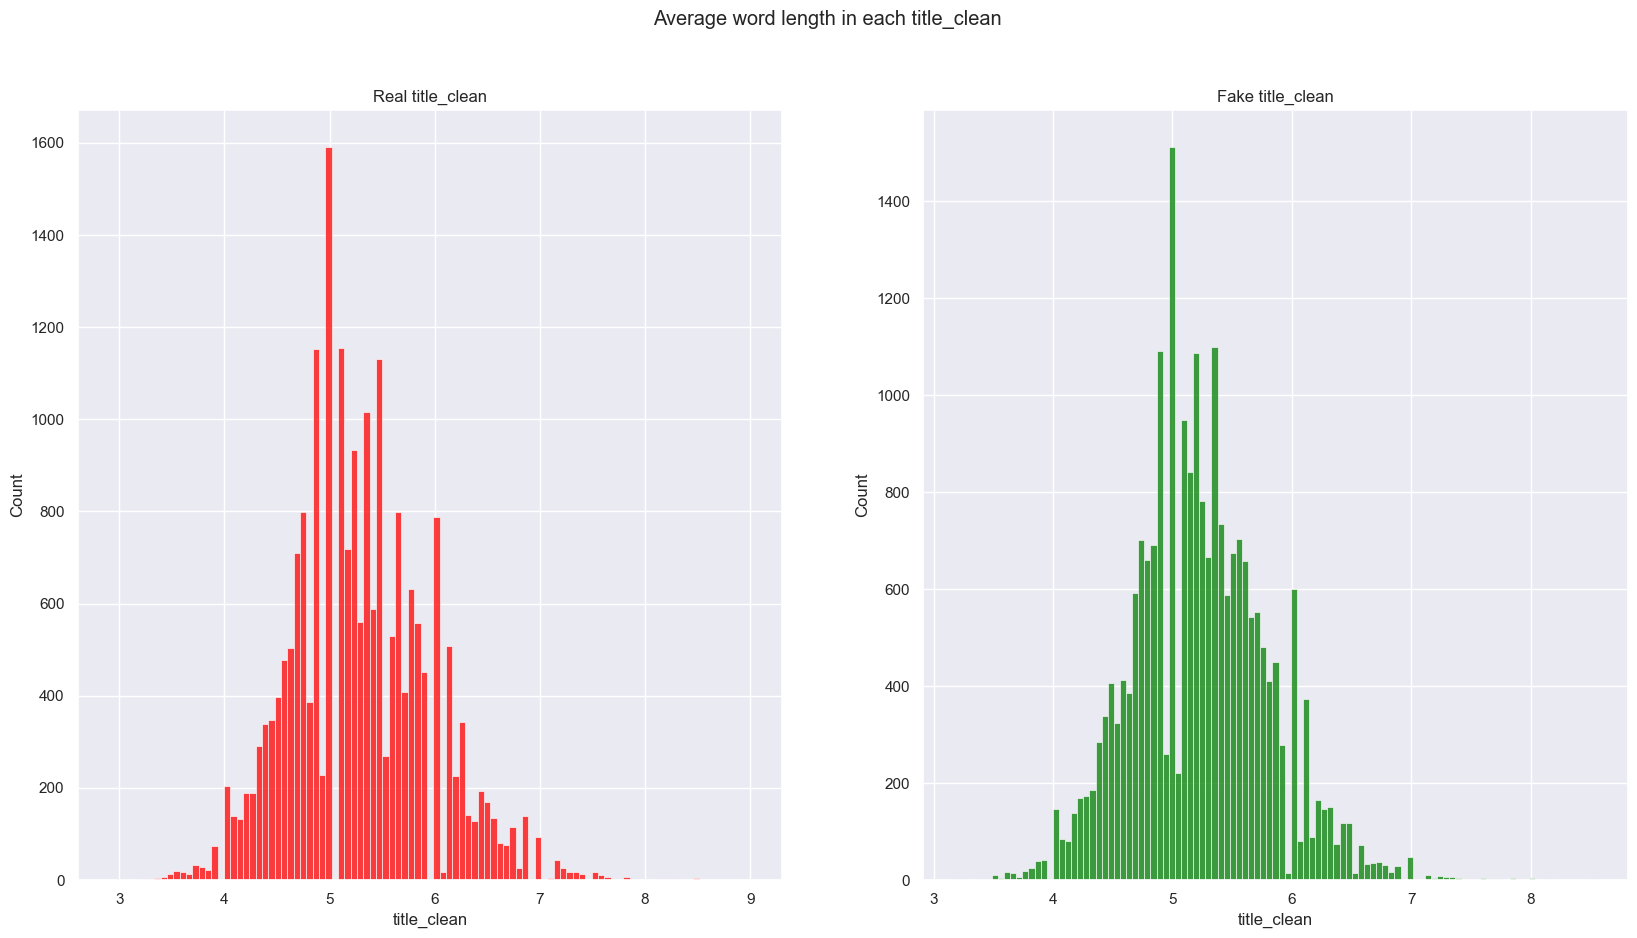

In [49]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data[data['label']==1]['title_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Real title_clean')
word=data[data['label']==0]['title_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake title_clean')
fig.suptitle('Average word length in each title_clean')

### The average word length in both fake and real news titles appears to be quite similar, indicating that this feature might not be as useful for distinguishing between the two types of articles.

## Average word length in 'text_clean'(Interactive)

Text(0.5, 0.98, 'Average word length in each text_clean')

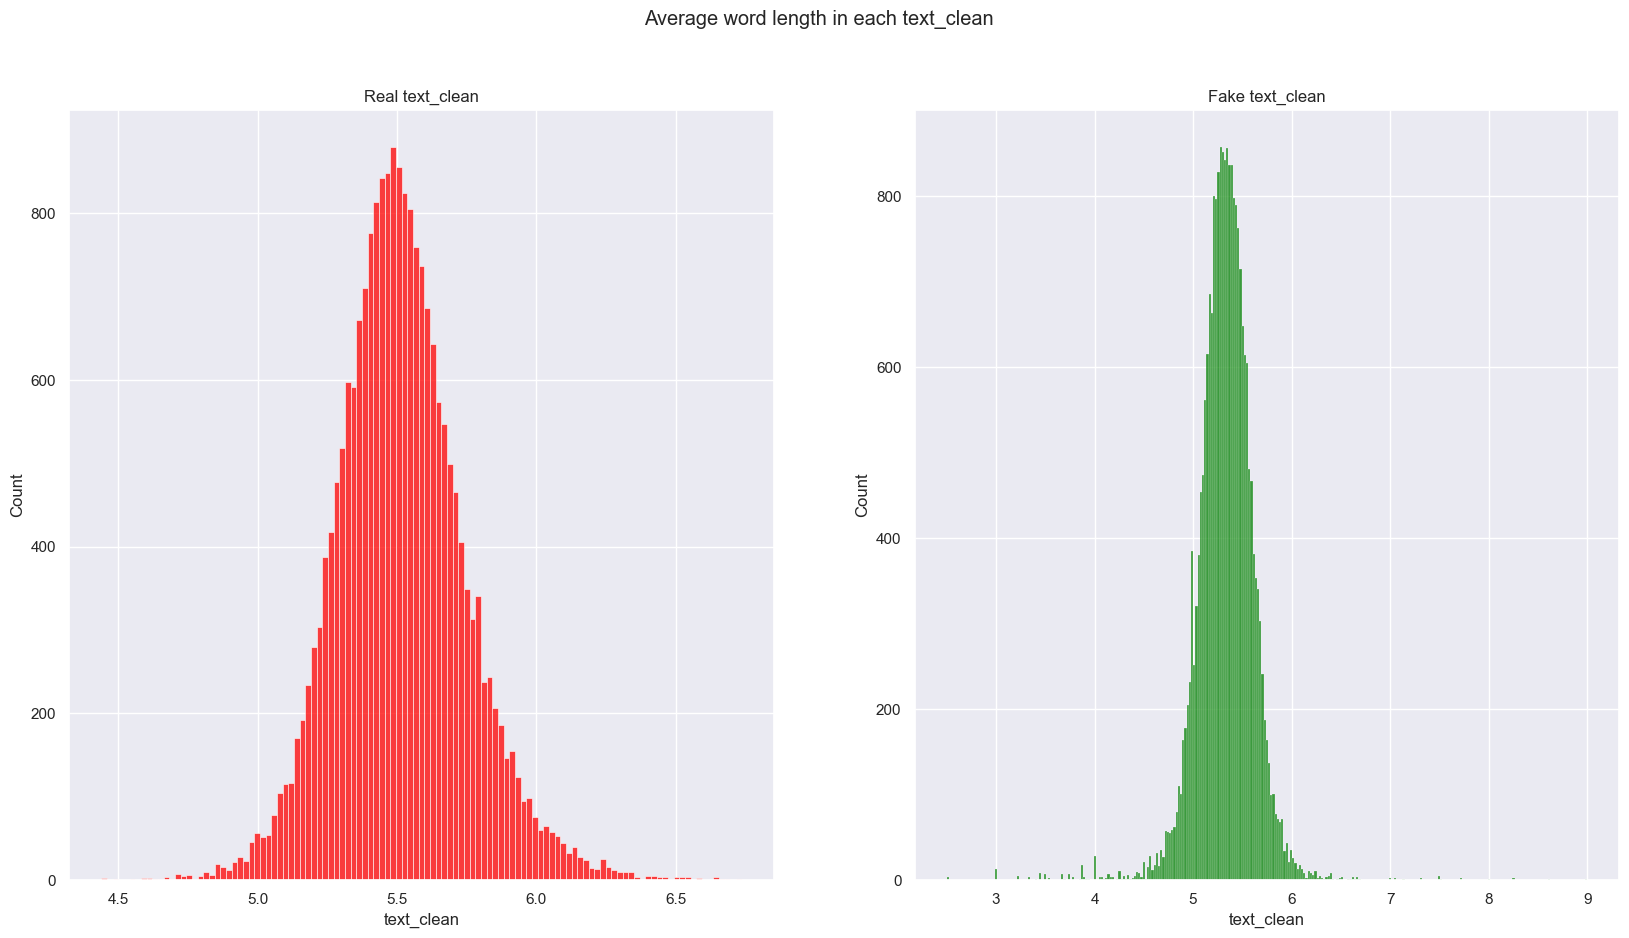

In [50]:
fig,(ax1,ax2)=plt.subplots(1,2,figsize=(20,10))
word=data[data['label']==1]['text_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax1,color='red')
ax1.set_title('Real text_clean')
word=data[data['label']==0]['text_clean'].str.split().apply(lambda x : [len(i) for i in x])
sns.histplot(word.map(lambda x: np.mean(x)),ax=ax2,color='green')
ax2.set_title('Fake text_clean')
fig.suptitle('Average word length in each text_clean')

### The average word length in both fake and real news texts appears to be quite similar, indicating that this feature might not be as useful for distinguishing between the two types of articles.

## Unigram analysis for 'title_clean'(Interactive)

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
import plotly.graph_objs as go

def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

most_common_uni = get_top_text_ngrams(data.title_clean,10,1)
most_common_uni = dict(most_common_uni)

fig = go.Figure()
fig.add_trace(go.Bar(
    x=list(most_common_uni.values()),
    y=list(most_common_uni.keys()),
    orientation='h'
))

fig.update_layout(
    title='Top 10 Unigrams in Title Clean',
    xaxis_title='Frequency',
    yaxis_title='Unigram'
)

fig.show()

### The most common unigrams in titles for both fake and real news articles include words like "trump", "video" and "say" which shows the prominence of politics and current events in news headlines.

## Unigram analysis for 'text_clean'(Interactive)

In [22]:
from plotly.subplots import make_subplots

# Define function to get top ngrams
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 unigrams
most_common_uni = get_top_text_ngrams(data.text_clean, 10, 1)
most_common_uni = dict(most_common_uni)

# Create subplots
fig = make_subplots(rows=1, cols=1)

# Create bar chart trace
trace = go.Bar(x=list(most_common_uni.keys()), y=list(most_common_uni.values()), marker_color='rgb(102, 153, 255)')

# Update layout
fig.update_layout(title='Top 10 Most Common Unigrams in text_clean', xaxis_title='Unigrams', yaxis_title='Count')

# Add trace to subplot
fig.add_trace(trace, row=1, col=1)

# Show figure
fig.show()

### The most common unigrams in texts also include similar words suggesting that the content of both fake and real news articles revolves around similar themes.

## Bigram Analysis for 'title_clean'(Interactive)

In [23]:
# Function to get the top n n-grams
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get the top 10 bigrams in the title_clean column
most_common_bi = get_top_text_ngrams(data.title_clean, 10, 2)
most_common_bi = dict(most_common_bi)

# Create the bar plot
fig = go.Figure(go.Bar(
            x=list(most_common_bi.values()),
            y=list(most_common_bi.keys()),
            orientation='h'))

# Update the layout
fig.update_layout(
    title='Top 10 Bigrams in Title Clean Column',
    xaxis_title='Count',
    yaxis_title='Bigram',
    yaxis_categoryorder='total ascending',
    height=500,
    margin=dict(l=100, r=20, t=70, b=70),
)

fig.show()

## Bigram Analysis for 'text_clean'(Interactive)

In [24]:
# Create a function to get top ngrams
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 bigrams in text_clean
most_common_bi = get_top_text_ngrams(data.text_clean,10,2)
most_common_bi = dict(most_common_bi)

# Create a DataFrame for the bar chart
df = pd.DataFrame({
    'Bigram': list(most_common_bi.keys()),
    'Count': list(most_common_bi.values())
})

# Create the bar chart
fig = go.Figure()
fig.add_trace(go.Bar(
    x=df['Bigram'],
    y=df['Count'],
    marker_color='rgb(102, 153, 255)'
))

# Update the layout
fig.update_layout(
    title='Top 10 Bigrams in Text Clean',
    xaxis=dict(title='Bigram'),
    yaxis=dict(title='Count'),
)

fig.show()

### It is interesting that the most common bigram in title is white house while the most common bigram in texts in donald trump

## Trigram Analysis for 'title_clean'(Interactive)

In [25]:
from sklearn.feature_extraction.text import CountVectorizer

# Get top 10 trigrams in title_clean column
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return dict(words_freq[:n])

top_trigrams = get_top_text_ngrams(data.title_clean, 10, 3)

# Create bar chart using Plotly
fig = go.Figure(go.Bar(
    x=list(top_trigrams.values()),
    y=list(top_trigrams.keys()),
    orientation='h',
    marker_color='rgb(102, 153, 255)'
))

fig.update_layout(
    title='Top 10 Trigrams in Title Clean',
    xaxis=dict(title='Count'),
    yaxis=dict(title='Trigram'),
    margin=dict(l=150),
    height=500
)

fig.show()


## Trigram Analysis for 'text_clean'(Interactive)

In [26]:
# Define function to get top n trigrams from a corpus
def get_top_text_ngrams(corpus, n, g):
    vec = CountVectorizer(ngram_range=(g, g)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0)
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

# Get top 10 trigrams from text_clean
top_trigrams = get_top_text_ngrams(data['text_clean'], 10, 3)
x = [trigram[0] for trigram in top_trigrams]
y = [trigram[1] for trigram in top_trigrams]

# Create the bar chart
fig = go.Figure()
fig.add_trace(go.Bar(x=x, y=y, marker_color='rgb(102, 153, 255)'))

# Update the layout
fig.update_layout(
    title='Top Trigrams in Text',
    xaxis=dict(title='Trigram'),
    yaxis=dict(title='Count')
)

fig.show()

### As we progress from unigram to trigram, the difference in quantity increases drastically to more than x20.
### We should realise that in texts, as words increases, they start to have meaning instead of random words like year and say.
### Donald Trump is still prevalent in both titles and texts.

## Number of Real and Fake News Article overtime(Interactive) 

In [33]:
import plotly.express as px
date_counts = data.groupby(['date', 'label']).size().reset_index(name='counts')
fig = px.line(date_counts, x='date', y='counts', color='label',
              title='Fake and Real News Articles Over Time')
fig.update_xaxes(tickangle=45, tickformat='%Y-%m-%d')
fig.update_layout(showlegend=False)
fig.show()

### It can be seen in the graph that, in the recent years, there has been a drastic increase in fake news while real news decreases.
### This goes to show how fake news can spread like wildfire easily and if not stopped, there will be serious implications.
### It is imperative that we should prevent the spread of such fake news.